In [17]:
# imports librairies and helper functions
from helpers import *

# imports NLP dataset
df = pd.read_csv("bad_reviews.csv")
data = df.sample(n=5000, replace=False)
data = data.reset_index().drop(columns=["index", "stars"])
pyLDAvis.enable_notebook()

# imports CV dataset
directory = (
    "F:\Ingenieur_IA\P6\cv_nlp\yelp_photos"  # modify with location of yelp_photos
)
imgs_df, labels = get_sample_imgs(imgs_per_label=100, dir=directory)

from IPython.display import Image as image_display

# Natural Language Processing: Automatic detection of topics of dissatisfaction in reviews

This topic modeling was carried out on reviews extracted from the Yelp database. The Yelp database contains 6 990 279 reviews, of which 156 067 are restaurant reviews. The restaurant reviews contain 32 593 negative reviews, or 1 to 2 star reviews.

We will be carrying out the topic modeling on a sample of 5000 restaurant reviews from the 32 593 negative reviews filtered out from the original Yelp database.

## 1. Text preprocessing

In order to be able to analyze reviews for topics, or in other words perform a topic modeling, we will need to preprocess the text in the reviews. The technique chosen for this project is the following: 
1. Demojize the emojis, for example transform 🔥 into the word "fire
2. Transform each review into lowercase
3. Separate each review into a list of separate words or tokens (using a Regular Expressions tokenizer)
4. Remove all english language stop words
5. Lemmatize each review to remove for example conjugations (using the WordNet lemmatizer from NLTK), as lemmatization is preferred in this case for providing more readable words
6. Remove words shorter than 4 characters
7. Keep only nouns

In [2]:
data["clean_text"] = data["text"].apply(lambda row: text_cleaner(row))
data

text  \
0     We went here for brunch on a Sunday with a lar...   
1     Slackssss once you get trapped in line you wil...   
2     Must have been seated by the managers nephew. ...   
3                          Sub-par. Go to Zaik instead.   
4     A co-worker told me about this new opening spo...   
...                                                 ...   
4995  Very disappointing. Customer service was poor....   
4996  I used to go her ln highschool with my girlfri...   
4997  WARNING!!! DO NOT ORDER FROM THIS PLACE!!!!  I...   
4998  If you like eggs in a carton this place is for...   
4999  The 2 is for the food. Service is 1 at best.  ...   

                                             clean_text  
0     [brunch, sunday, party, celebrate, family, tim...  
1                                          [line, mile]  
2     [manager, personality, dish, hole, want, stran...  
3                                                [zaik]  
4     [worker, spot, milk, check, california, hype, ...  
...                                                 ...  
4995  [customer, service, attention, waiter, bill, k...  
4996  [highschool, taco, taco, chicken, taco, burrit...  
4997  [order, place, hotel, room, yelp, star, review...  
4998  [carton, place, toast, side, mystery, hubby, o...  
4999  [service, order, water, order, chip, salsa, ch...  

[5000 rows x 2 columns]

### 1. A. Our corpus of reviews before cleaning

The most frequent words are mostly stop words, these words are not at all helpful to us and show us the necessity of performing a text preprocessing before modeling the topics.

Number of tokens: 699680, Number of unique tokens: 20668
['We', 'went', 'here', 'for', 'brunch', 'on', 'a', 'Sunday', 'with', 'a', 'larger', 'party', 'to', 'celebrate', 'a', 'few', 'birthdays', 'in', 'my', 'family', ',', 'but', 'there', 'was', 'no', 'one', 'else', 'in', 'the', 'restaurant']


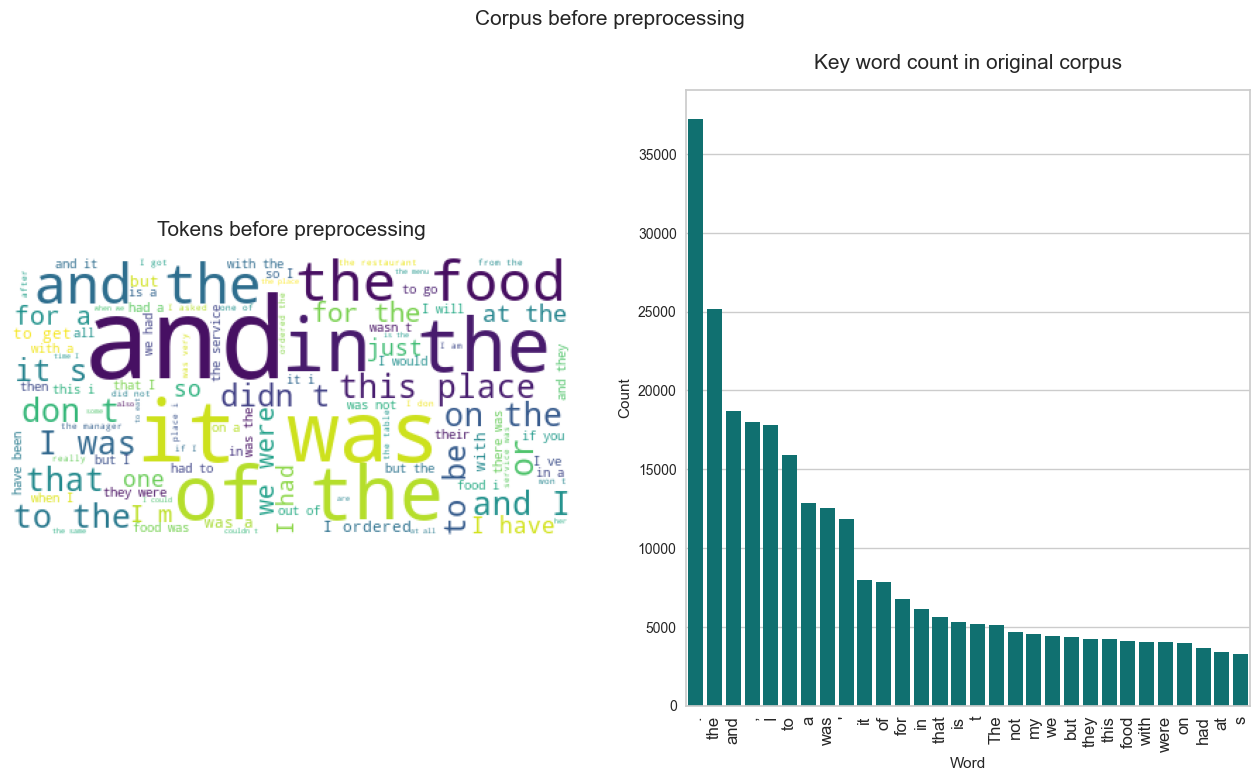

In [3]:
display_original_corpus_info(data)

### 1. B. Our corpus of reviews after cleaning

There is a clear improvement in our corpus since we now only have restaurant-related words which can be used by our model to detect the topics.

Number of tokens: 98521, Number of unique tokens: 6939
['brunch' 'sunday' 'party' 'celebrate' 'family' 'time' 'reservation'
 'time' 'cake' 'dollar' 'person' 'cake' 'half' 'party' 'side' 'everyone'
 'plate' 'dish' 'salsa' 'mine' 'meal' 'waitress' 'chef' 'time' 'meal'
 'waitress' 'someone' 'meal' 'everyone' 'meal']


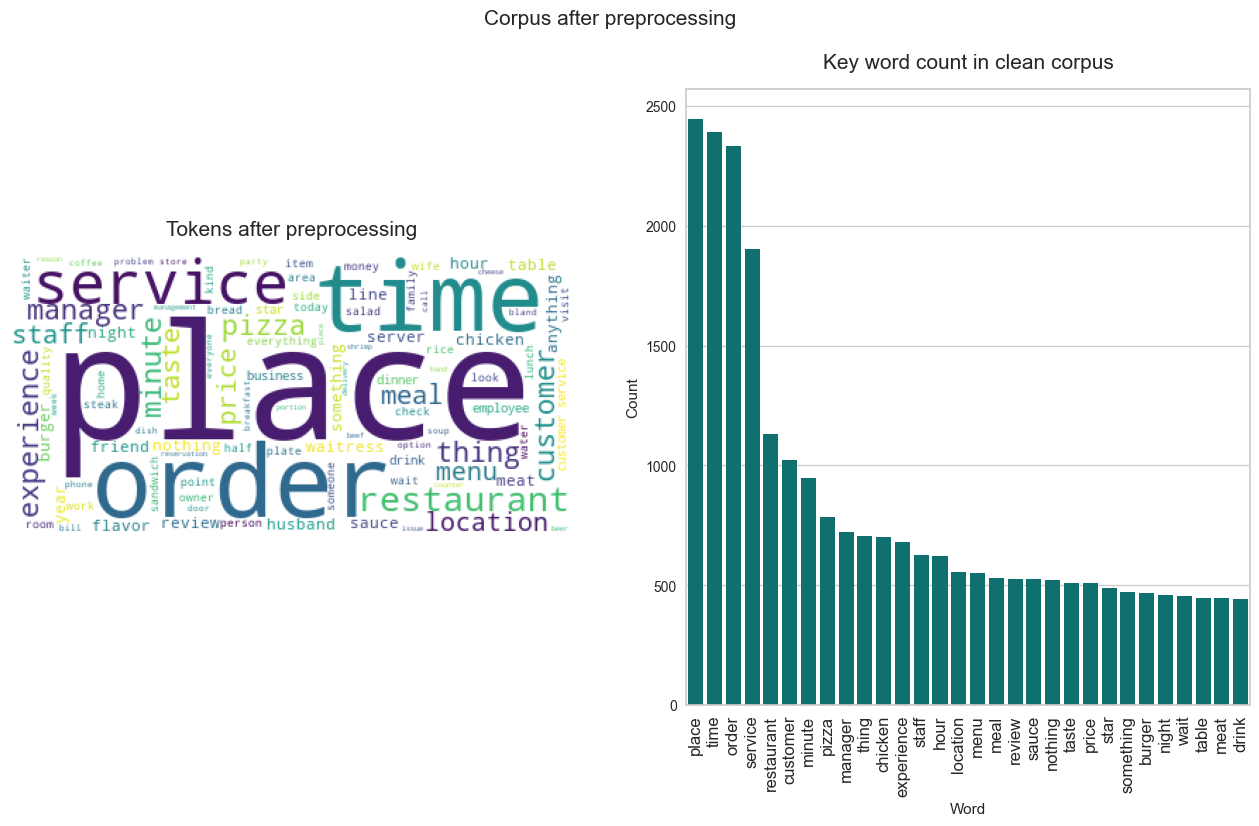

In [4]:
display_clean_corpus_info(data)

## 2. Training the LDA model

The LDA or the Latent Dirichlet Allocation model will allow us to detect topics in our reviews, sets of words that cluster together and have a higher probability to appear together in a review.  

At first we will use a smaller sample of 1000 of the reviews in order to calculate the ideal number of topics, after which we will give our final model 5000 reviews to have the most precision in our topics.

### 2. A. Number of topics for the model

In order to calculate the ideal number of topics, we check the coherence score of our model. We have the option of using u_mass coherence, which is faster computationally but less accurate or to use c_v, which is slower but more accurate. I decided to use a sample of 1000 reviews and calculate the c_v, which explains the apparently lower than expected score. If we were to take a larger sample size or use the whole dataset of reviews, our c_v score would be much higher.

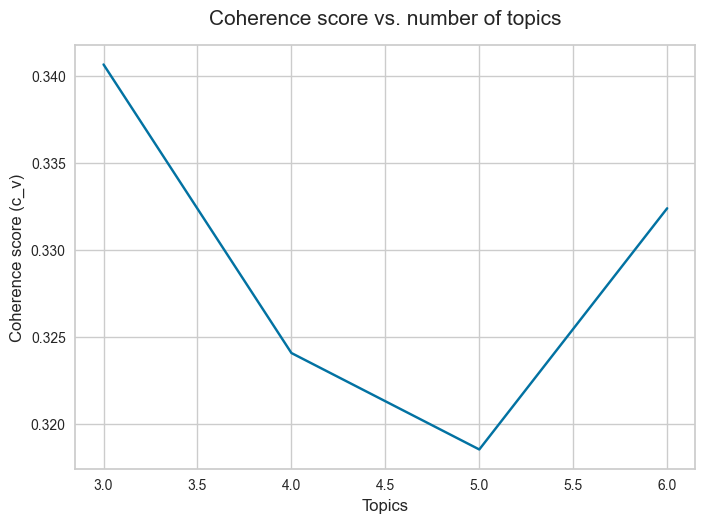

In [5]:
topics, coherence = get_coherence_data(data)
plot_coherence(topics, coherence)

### 2. B. LDA Gensim with the final number of topics

Now that we have decided on 4 topics, the area of the graph where we see a clear elbow, we will use our final LDA model with 5000 reviews.

In [10]:
lda, corpus, id2word, topics = print_LDA_topics(data)

#### pyLDAvis visualization of the intertopic distance and top-30 most relevant terms per topic

In [14]:
pyLDAvis.gensim_models.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.074043  0.001583       1        1  25.562169
0      0.090858 -0.362522       2        1  25.082367
1     -0.391807  0.079323       3        1  24.789077
2      0.226906  0.281616       4        1  24.566386, topic_info=           Term         Freq        Total Category  logprob  loglift
13        place  2679.000000  2679.000000  Default  30.0000  30.0000
20         time  2548.000000  2548.000000  Default  29.0000  29.0000
241       order  2442.000000  2442.000000  Default  28.0000  28.0000
96      service  1970.000000  1970.000000  Default  27.0000  27.0000
70   restaurant  1251.000000  1251.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
157        cold   131.481185   131.792989   Topic4  -5.2154   1.4014
79       amount   124.442659   124.754446   Topic4  -5.2704   1.4013
875   attention   123.647678   123.959469   Topic4  -5.2768   1.4013
96      service  1917.230262  1970.896296   Topic4  -2.5356   1.3762
8          half   263.696503   307.693442   Topic4  -4.5194   1.2495

[152 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
79        4  0.993953     amount
24        3  0.999613   anything
64        3  0.997820       area
875       4  1.000327  attention
1137      3  1.000898  bartender
...     ...       ...        ...
142       2  0.998180      water
246       3  0.996372       week
177       3  0.999365       wife
395       1  1.000532       work
111       3  1.000163       year

[124 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

In [15]:
topics

[(0,
  '0.039*"pizza" + 0.028*"chicken" + 0.025*"menu" + 0.023*"sauce" + 0.021*"taste" + 0.020*"meal" + 0.019*"price" + 0.019*"flavor" + 0.018*"meat" + 0.017*"dinner"'),
 (1,
  '0.110*"place" + 0.051*"restaurant" + 0.031*"thing" + 0.024*"review" + 0.022*"star" + 0.020*"year" + 0.019*"something" + 0.019*"night" + 0.018*"anything" + 0.015*"everything"'),
 (2,
  '0.105*"time" + 0.101*"order" + 0.079*"service" + 0.029*"experience" + 0.027*"location" + 0.027*"staff" + 0.022*"nothing" + 0.018*"drink" + 0.018*"server" + 0.018*"wait"'),
 (3,
  '0.041*"customer" + 0.039*"minute" + 0.029*"manager" + 0.024*"hour" + 0.017*"table" + 0.017*"business" + 0.016*"money" + 0.016*"employee" + 0.015*"someone" + 0.015*"room"')]

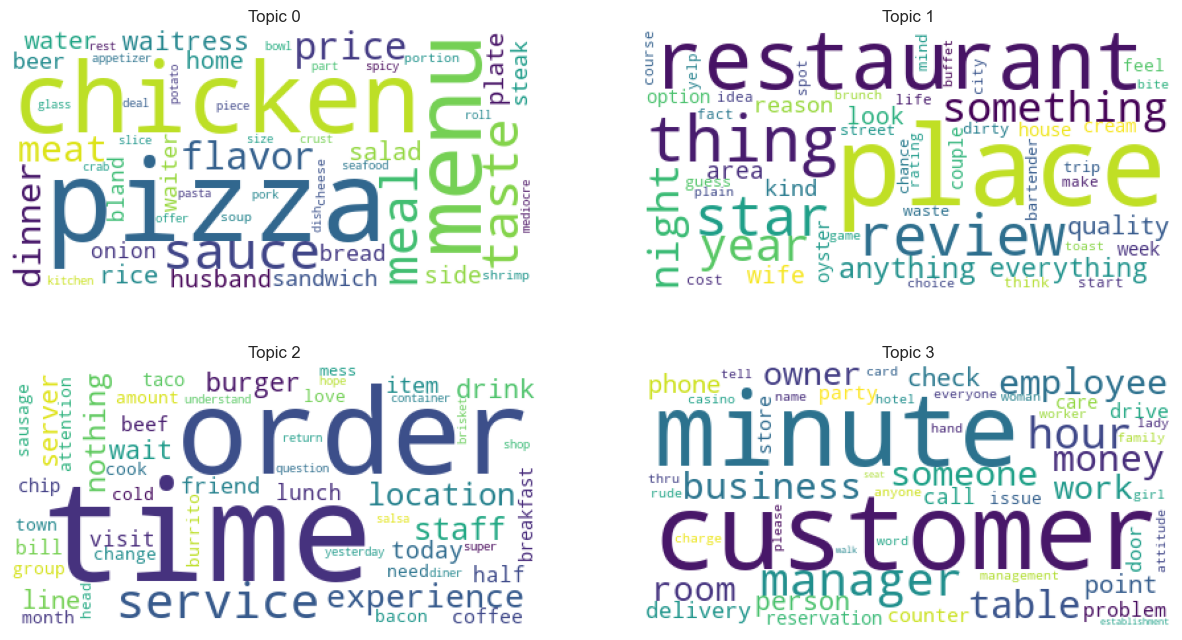

In [16]:
print_topic_wordclouds(lda)

## 3. Conclusion

We can see four clear topics emerge: 
1. Dissatisfaction about the meal, the menu, the taste of the food (flavor, mediocre, many food items).
2. Dissatisfaction about the restaurant, the quality (cost, dirty, look).
3. Dissatisfaction about the experience, the wait, the order, the service.
4. Dissatisfaction about the employees, the manager, the owner (attitude, problem, rude).

***

# Computer Vision: Automatic image labeling 

The data used for the automatic image labeling is the Yelp database, which contains 200 100 photos, with potential labels of: <b>inside</b>, <b>outside</b>, <b>drink</b>, <b>food</b> or <b>menu</b>.  

In order to equally represent each label, we will use 100 images from each label in our sample (we used 200 in the Jupyter notebooks), so we will be working on 500 images total.  

The objective of this exercise is to remove the original labels and to choose the most accurate method of automatically labeling the images.  

Two methods have been tested to choose the best-performing method:  
1. KMeans clustering of ORB (Oriented FAST and Rotated BRIEF) descriptors
2. Transfer Learning using Convolutional Neural Networks (VGG16)

## 1. KMeans clustering of ORB descriptors

Oriented FAST and Rotated BRIEF, or ORB for short, is an open source alternative to similar algorithms such as SIFT and SURF, which are patented. It uses FAST to detect the image keypoints and then computes the BRIEF descriptors. (More information here: https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html)  

### 1. A. Example of image preprocessing and computing descriptors

Before being able to detect descriptors in an image, we need to preprocess our images (or equalize their histograms, in our case). Let's take an image from our sample images and preprocess it: 

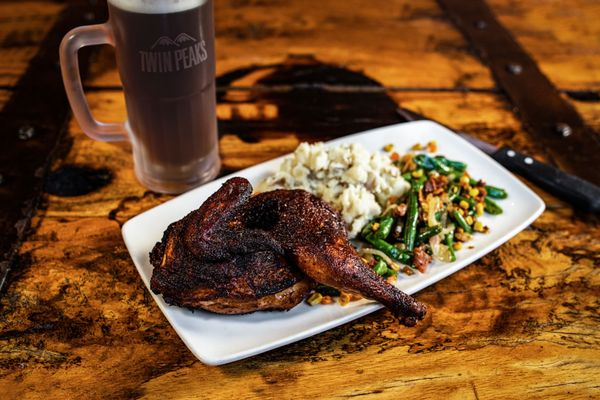

In [3]:
img = Image.open(directory + "\\photos\\" + imgs_df.photo_id.iloc[300] + ".jpg")
img

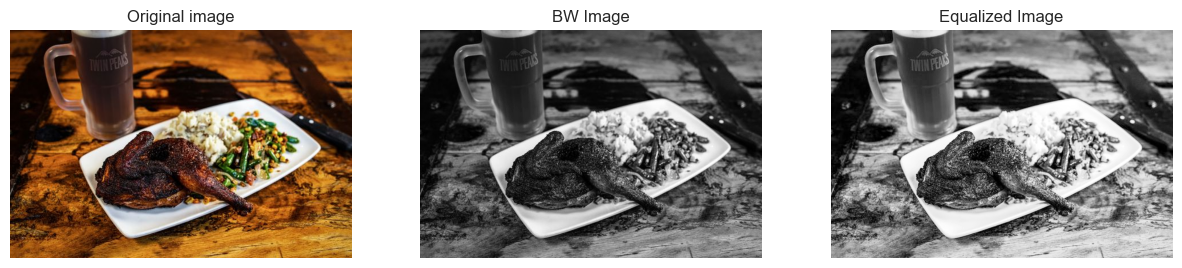

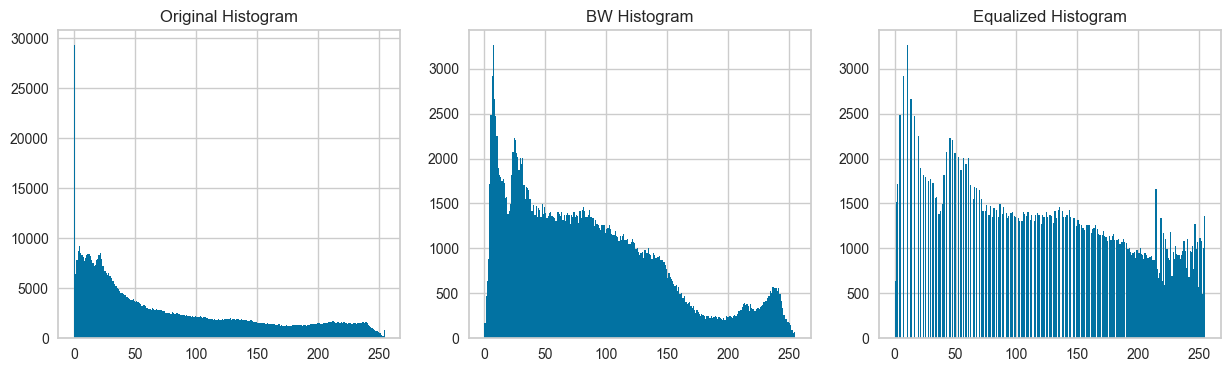

In [4]:
show_preprocessing_steps(img)

We see that the histogram has been equalized, let's now use ORB to compute 100 features and show them on the image:

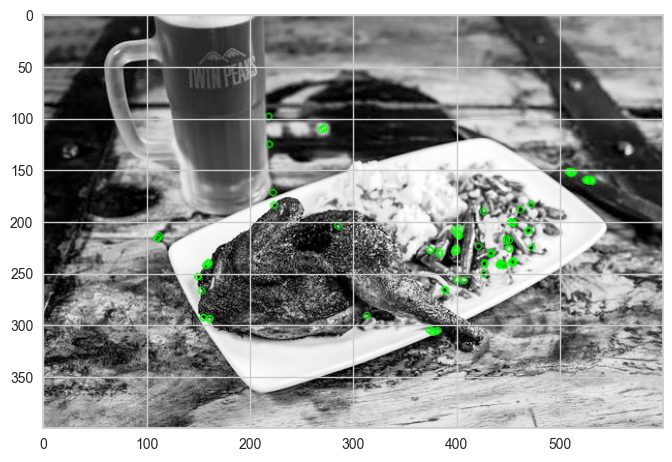

In [5]:
keypoints, descriptors, preprocessed_image = get_keypoints(img)
plot_keypoints(preprocessed_image, keypoints)

### 1. B. Clustering our images with the ORB descriptors

Each keypoint has an array of descriptors, which is the data we will ask KMeans to analyze and separate into 5 clusters (our 5 labels). 

In [6]:
descriptors = get_batch_descriptors(photo_ids=imgs_df["photo_id"], directory=directory)
print(
    "Dimension of descriptors: "
    + str(len(descriptors))
    + " descriptors of length "
    + str(len(descriptors[0]))
)
print("First descriptor: " + str(descriptors[0]))

Dimension of descriptors: 500 descriptors of length 2000
First descriptor: [  1 249  27 ...  35  28 117]


We will then use PCA to reduce the dimension of our descriptors to explain 90% of the variance.

In [7]:
pca = PCA(n_components=0.90, random_state=42)
feat_pca = pca.fit_transform(descriptors)
print("Dimension after PCA reduction : ", feat_pca.shape)

Dimension after PCA reduction :  (500, 352)


And finally we will use KMeans to cluster our descriptors into 5 clusters (representing food, drink, outside, inside, menu).

In [8]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(feat_pca)
label

array([0, 2, 1, 2, 2, 3, 2, 0, 3, 4, 4, 1, 4, 1, 4, 0, 4, 0, 3, 0, 3, 2,
       1, 4, 3, 3, 3, 2, 3, 3, 2, 2, 4, 3, 4, 3, 0, 1, 1, 2, 4, 3, 3, 3,
       0, 3, 2, 2, 3, 0, 0, 1, 2, 3, 3, 0, 2, 4, 3, 0, 1, 1, 1, 0, 3, 3,
       4, 3, 3, 3, 3, 4, 1, 4, 2, 3, 1, 3, 2, 0, 3, 4, 3, 0, 4, 3, 0, 2,
       0, 4, 4, 0, 0, 3, 0, 4, 2, 3, 2, 3, 2, 0, 2, 3, 1, 2, 0, 4, 1, 0,
       0, 0, 2, 3, 4, 4, 1, 2, 3, 3, 3, 1, 0, 3, 3, 3, 4, 3, 3, 4, 3, 1,
       3, 0, 4, 3, 0, 3, 2, 3, 0, 0, 0, 2, 2, 3, 0, 2, 2, 1, 1, 3, 3, 0,
       3, 1, 4, 0, 3, 4, 4, 1, 3, 2, 2, 2, 4, 4, 1, 3, 4, 4, 2, 4, 1, 4,
       0, 4, 0, 0, 1, 4, 0, 3, 3, 2, 3, 0, 4, 4, 2, 4, 2, 2, 4, 4, 3, 0,
       1, 2, 0, 4, 1, 2, 0, 3, 3, 4, 4, 1, 2, 3, 1, 3, 4, 4, 2, 2, 4, 0,
       0, 2, 3, 1, 4, 0, 4, 4, 1, 4, 4, 0, 0, 4, 4, 3, 0, 0, 2, 0, 0, 2,
       4, 0, 0, 0, 0, 3, 2, 3, 4, 2, 3, 4, 2, 2, 2, 2, 3, 0, 2, 2, 3, 1,
       4, 4, 0, 3, 0, 4, 4, 4, 4, 1, 4, 4, 3, 2, 4, 0, 0, 3, 3, 2, 2, 3,
       0, 4, 0, 4, 4, 0, 0, 2, 0, 0, 4, 2, 0, 3, 2,

In [9]:
imgs_df["kmeans_label"] = label
imgs_df.groupby(by=imgs_df.label).kmeans_label.value_counts()

label    kmeans_label
drink    4               29
         0               27
         2               20
         3               17
         1                7
food     4               31
         0               24
         3               23
         2               12
         1               10
inside   3               33
         0               19
         2               18
         4               18
         1               12
menu     0               26
         4               26
         2               24
         3               15
         1                9
outside  3               26
         4               22
         0               20
         2               19
         1               13
Name: kmeans_label, dtype: int64

We can notice with the comparison between the true label and the kmeans label that there is no noticeable pattern, we cannot say that the kmeans label 1 is most often given to photos with a true label of "food" for example.  

Let's visualize the data with t-SNE in two dimensions as a last attempt to find associations between the true and predicted labels.

ARI :  0.015019048620507871


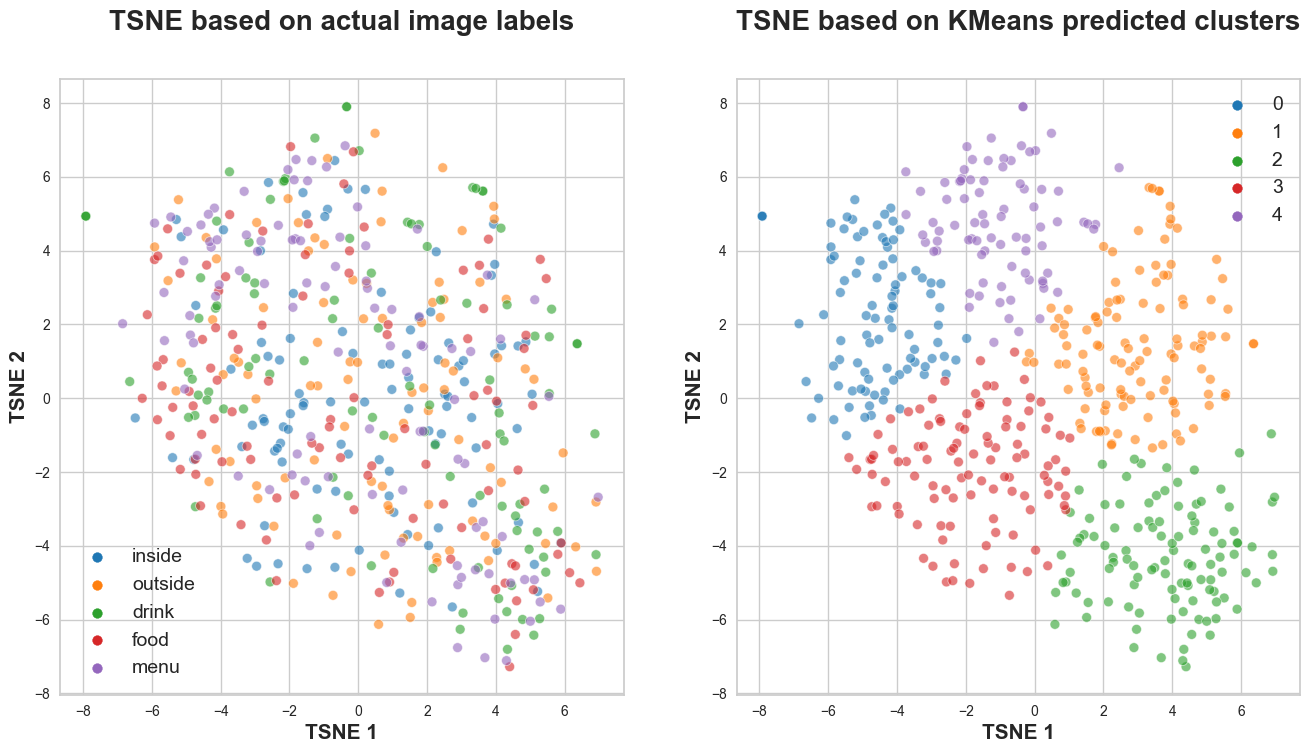

In [10]:
tsne_visualizer(descriptors=descriptors, photos_data=imgs_df)

### 1. C. Conclusion

The adjusted rand index (ARI) of the true labels vs. the predicted labels is 1%. This is a low number and it means our clustering with ORB predictors did not work as well as we hoped. In the next part, we will try to do something similar using a deep learning algorithm and hopefully get better results.

## 2. Transfer Learning with VGG16

A Convolutional Neural Network (CNN or ConvNet) is a type of neural network typically used in image recognition, image classification, object detections, face recognitions, etc. We will be using a neural network which has convolutional layers for feature extraction and pooling layers for reducing the dimensions of our feature maps.  

We will not be using the fully connected layers or softmax because we will not be training the model at this point but using the model pretrained on the labeled ImageNet database, so we will be carrying out Transfer Learning, or reusing a previously trained model on a new problem. 

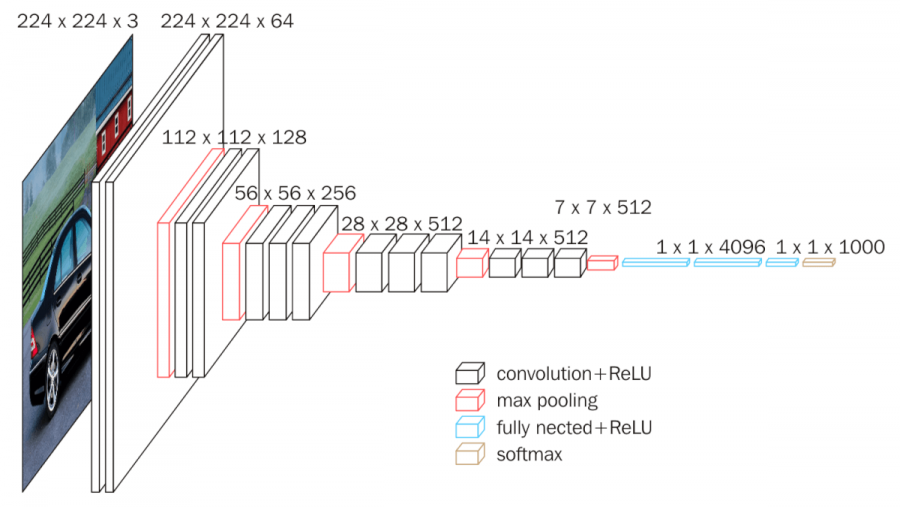

In [2]:
image_display(filename="vgg16.png")

Here is our model, where as expected we do not have the last fully connected and softmax layers:

In [3]:
vgg16 = keras.applications.vgg16
vgg = vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

for layer in vgg.layers:
    layer.trainable = False  # do not train existing weights

x = Flatten()(vgg.output)  # flatten the last layer

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### 2. A. Example of feature extraction with VGG16

The shape of our extracted features from the sample image is (7,7,512), corresponding to the last layer of our model or the last "max pooling" layer in VGG16 diagram above.

In [4]:
extract_vgg16_features(directory + "\\photos\\" + imgs_df.photo_id.iloc[300] + ".jpg")

1/1 [==============================] - 4s 4s/step
(1, 7, 7, 512)


### 2. B. Feature extraction on 500 photos with VGG16

In [159]:
features = get_vgg16_features(photo_ids=imgs_df.photo_id, directory=directory)

ARI :  0.5632777907520027


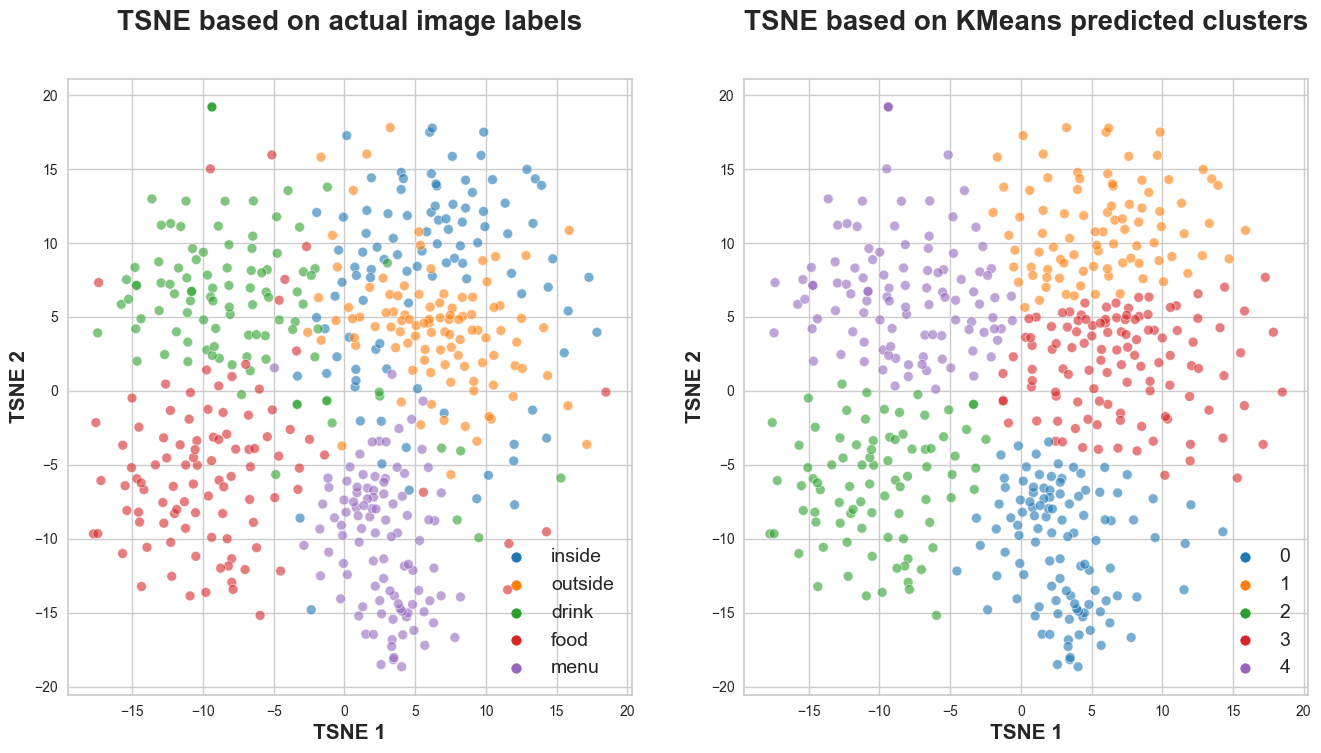

In [20]:
df_tsne = prep_tsne(features=features, true_labels=imgs_df.label)
tsne_visualizer_vgg(df_tsne)

### 2. C. Results

We achieve an ARI score of 56% which is pretty good considering the model isn't trained on our data and we have only given it 500 photos to work with. Thanks to the t-SNE plots, we can see which true labels correspond to the KMeans predicted labels. We are going to map them to their names in order to have a clear classification of our results.

In [15]:
class_dictionary = {0: "menu", 1: "inside", 2: "food", 3: "outside", 4: "drink"}

In [94]:
df_tsne["predicted_class"] = df_tsne["cluster"].map(class_dictionary)

Classification Report
              precision    recall  f1-score   support

       drink       0.80      0.84      0.82       100
        food       0.95      0.81      0.88       100
      inside       0.73      0.64      0.68       100
        menu       0.85      0.92      0.88       100
     outside       0.63      0.72      0.67       100

    accuracy                           0.79       500
   macro avg       0.79      0.79      0.79       500
weighted avg       0.79      0.79      0.79       500

******************************************************
Confusion Matrix


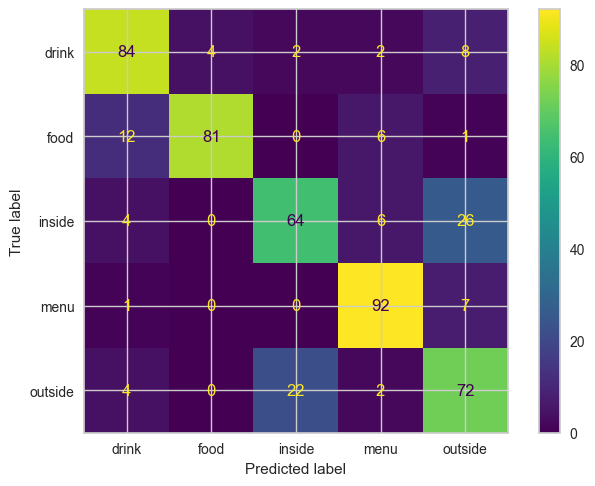

In [129]:
print("Classification Report")
print(classification_report(df_tsne["class"], df_tsne["predicted_class"]))
print("******************************************************")
print("Confusion Matrix")
confusion_matrix = metrics.confusion_matrix(
    df_tsne["class"], df_tsne["predicted_class"]
)
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=["drink", "food", "inside", "menu", "outside"],
)
cm_display.plot()
plt.show()

We have a total precision of 79%. The label predicted with most precision is "food" whilst the least precision was "outside". The labels most often confused are "inside" and "outside, as well as "food" and "drink".

### 2. D. Examples of mislabeled photos

<b>"Inside" predicted as "Outside": 26 occurences</b>

The reason for these mismatchings are probably the lighting in the photos. The second and fourth photo have a colder lighting that is similar to natural light. The first and third photo also have framed pictures which might be misinterpreted by the model, especially the third photo which has a framed picture of the sky with the sun. 

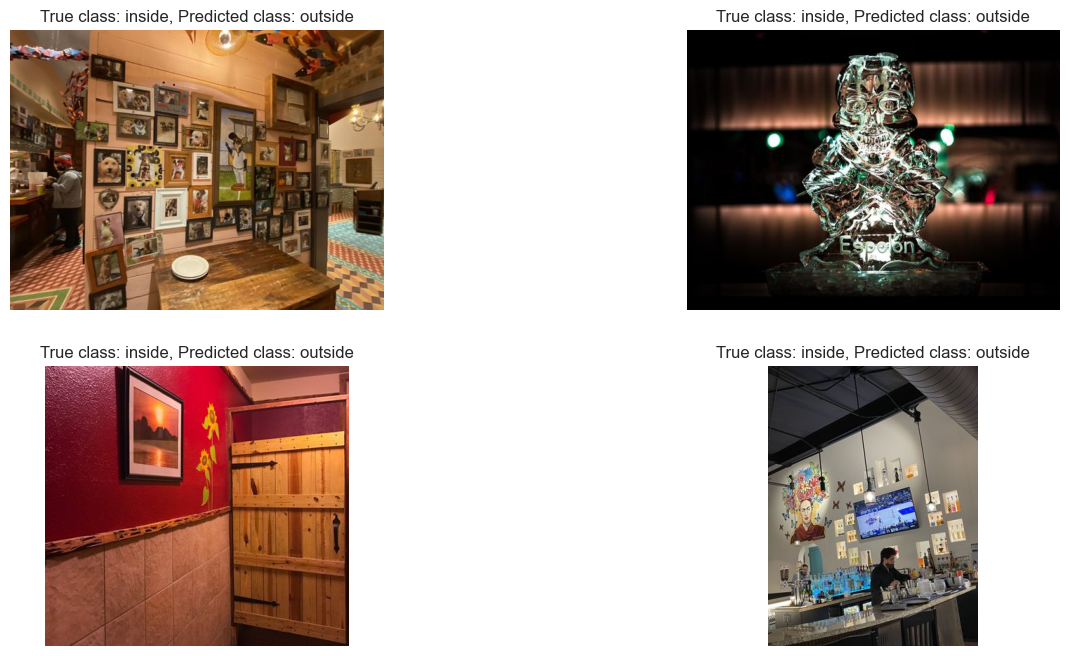

In [147]:
display_mislabeled_pics(
    true_class="inside",
    predicted_class="outside",
    df_tsne=df_tsne,
    photo_ids=imgs_df.photo_id,
)

<b>"Outside" predicted as "Inside": 22 occurences</b>

The first photo is probably mislabeled from the beginning, as it is truly a photo of an interior. The second photo is under some sort of roof which might be misinterpreted as a ceiling. The fourth photo also has most of the top area covered with an umbrella and a roof which might be misinterpreted as a ceiling.

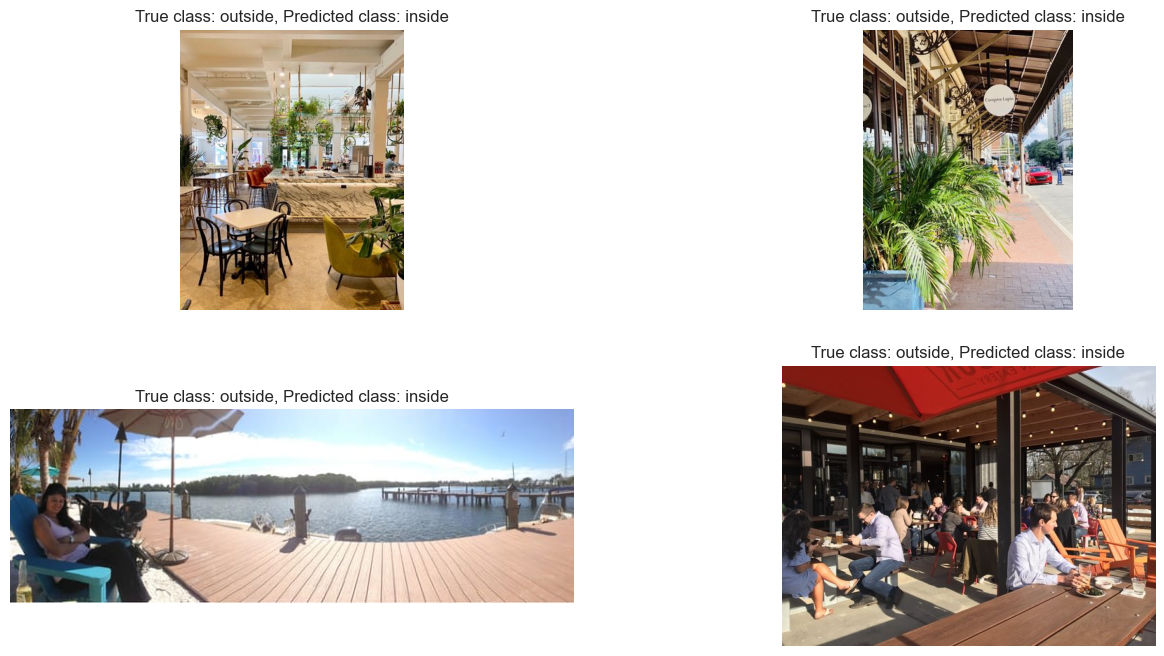

In [146]:
display_mislabeled_pics(
    true_class="outside",
    predicted_class="inside",
    df_tsne=df_tsne,
    photo_ids=imgs_df.photo_id,
)

<b>"Food" predicted as "Drink": 12 occurences</b>

The first and third photo both have a round shaped bowl of sauce which might be misinterpreted as a drink. The second has a similar plastic transparent cup and might be misinterpreted for resembling a small cup. The last photo might have been mislabeled due to the presence of a lime, which is often found on drinks.

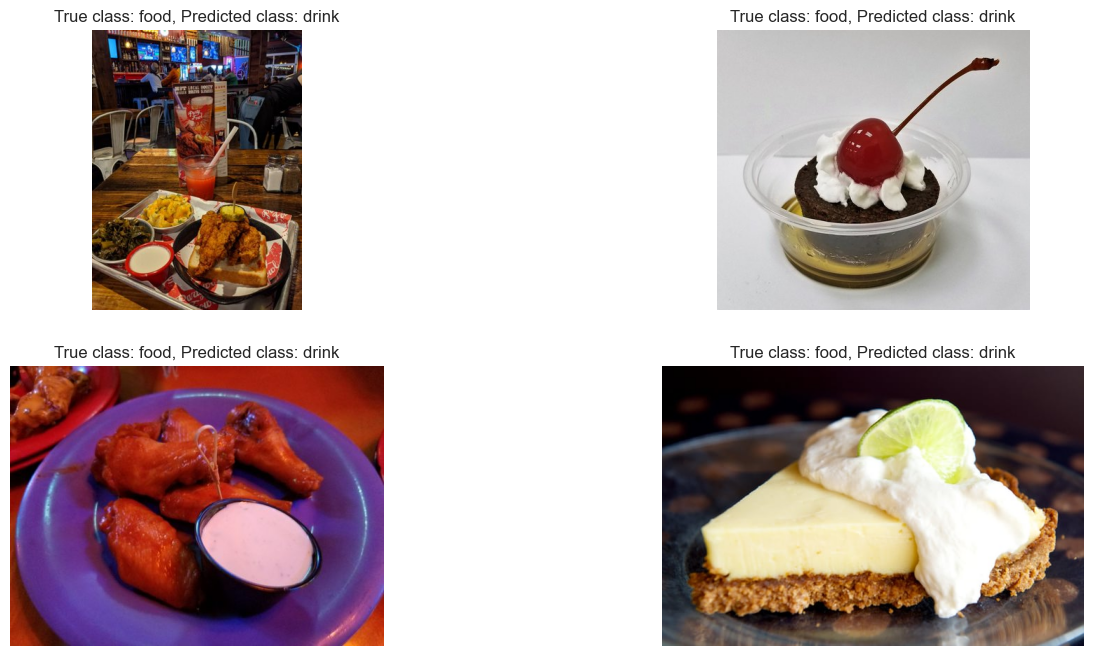

In [145]:
display_mislabeled_pics(
    true_class="food",
    predicted_class="drink",
    df_tsne=df_tsne,
    photo_ids=imgs_df.photo_id,
)

<b>"Drink" predicted as "Outside": 8 occurences</b>

The first photo has very natural lighting which might be causing the mislabeling, and the second photo seems to have been taken outside. The items on the photo are not very identifiable so it isn't surprising that the model is having some trouble.

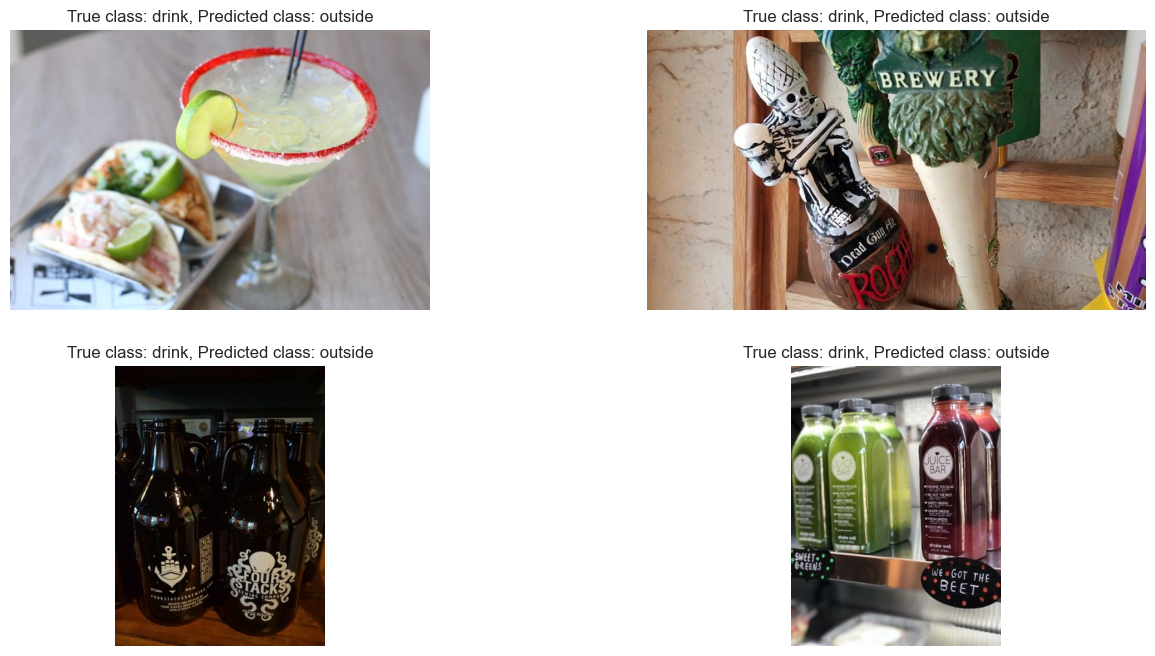

In [148]:
display_mislabeled_pics(
    true_class="drink",
    predicted_class="outside",
    df_tsne=df_tsne,
    photo_ids=imgs_df.photo_id,
)

## 3. Conclusion

In synthesis, using the features extracted with the transfer learning model via VGG16 performed much better than using the features extracted through ORB. If we were to carry out a supervised learning on the VGG16 model and test it using not just 500 photos but thousands, we would certainly reach very satisfactory precision. 